# Tabla Y4-125

In [1]:
#!pip install specdal spectrum


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip


Extraer datos

In [3]:
import os
from specdal import Collection, Spectrum, read
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

datadir = "./Espectros_FORS_2/Y4"
archivos = list()
specs = list()
specs_df = list()
etiquetas = ['A1','A2','A3','A4','A5',
             'B1','B2','B3','B4','B5',
             'C1','C2','C3','C4','C5',
             'D1','D2','D3','D4','D5',
             'E1','E2','E3','E4','E5',
            ]
features = []

for f in os.listdir(datadir):
    title =str(f)[8:-8]
    archivos.append(f)
archivos.sort()

In [4]:
for f in archivos:
    data = pd.read_csv(datadir+"/"+f,delimiter='\t')
    title =str(f)[:-4]
    dev_x = data['Wavelength']
    dev_y = data[title]
    df = pd.DataFrame({'x': dev_x, 'y': dev_y})
    specs_df.append(df)
    tmp_arr = df.to_numpy()
    specs.append(tmp_arr)

    tmp = np.array(dev_y)
    features.append(tmp)
print(len(specs))
print(len(specs_df))
len(features)

125
125


125

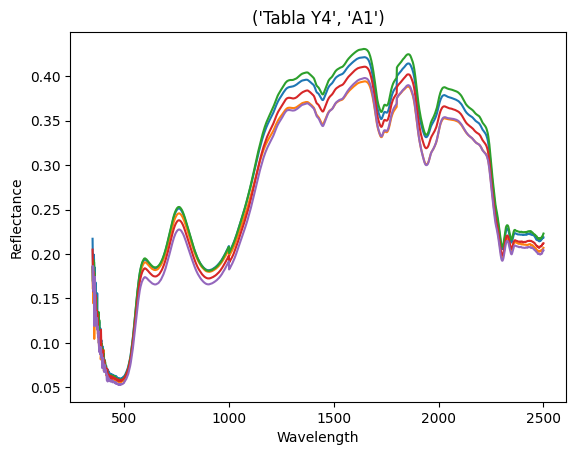

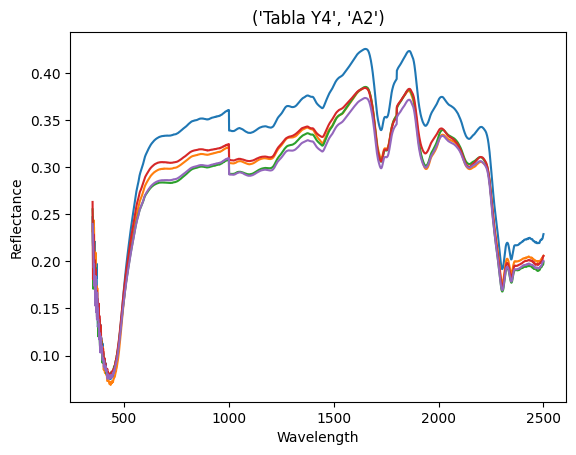

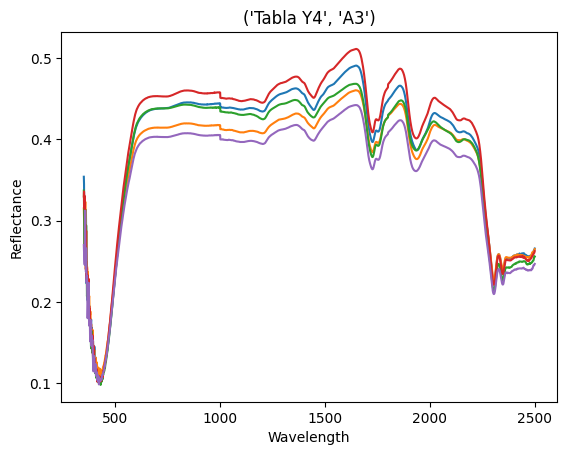

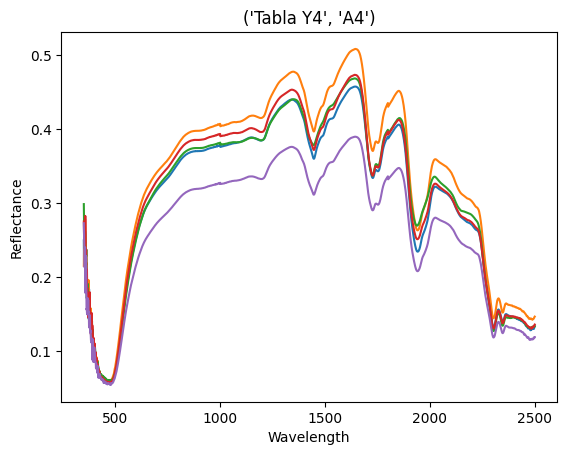

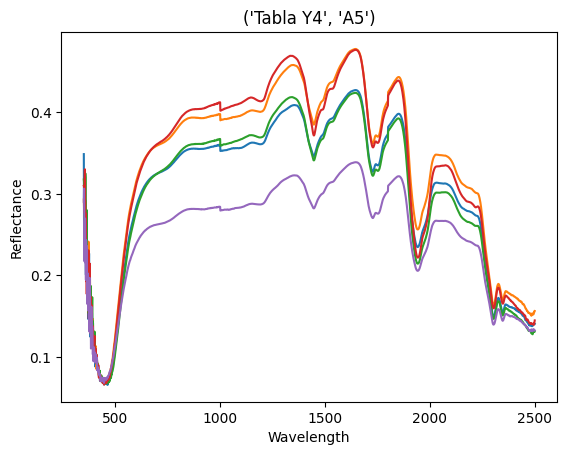

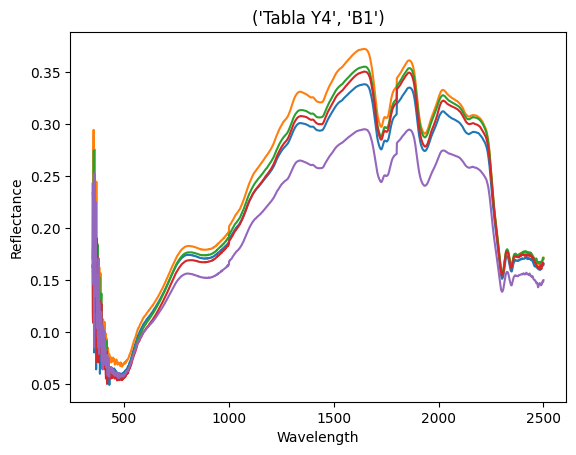

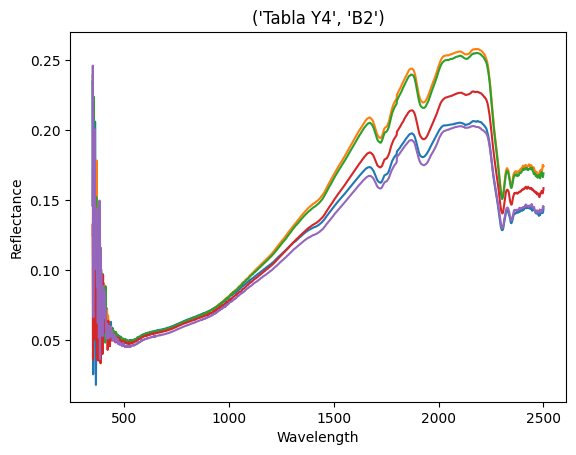

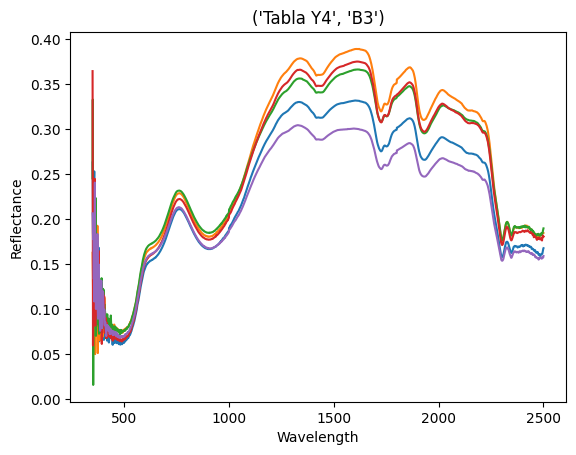

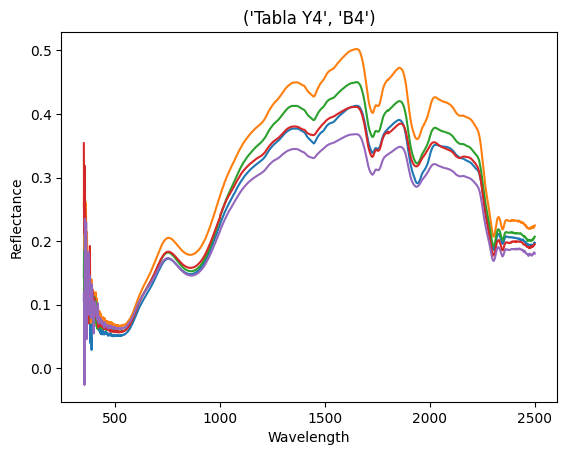

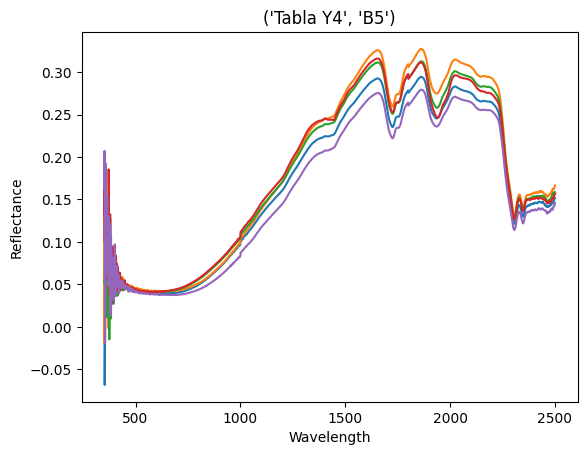

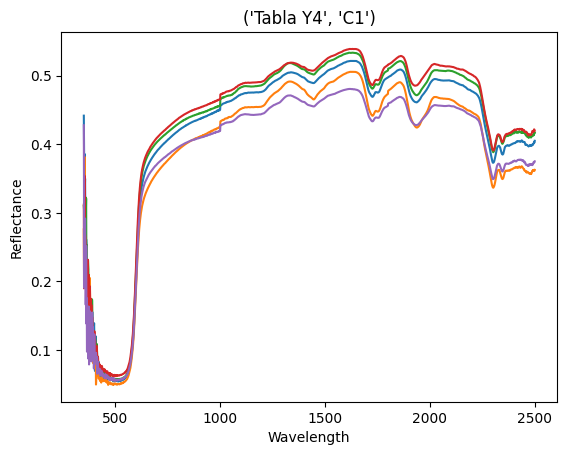

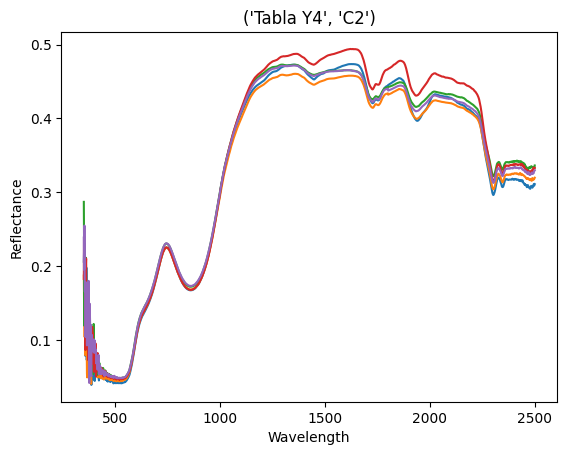

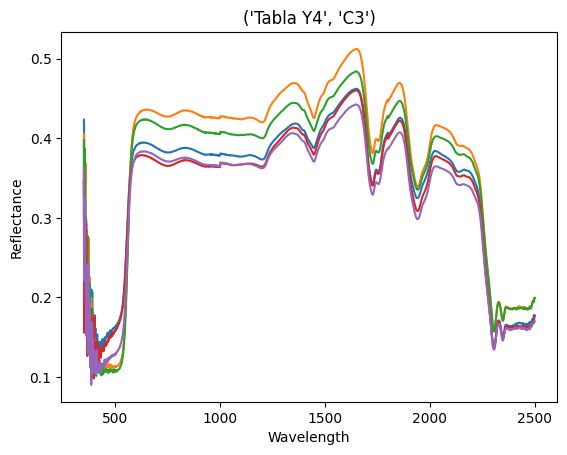

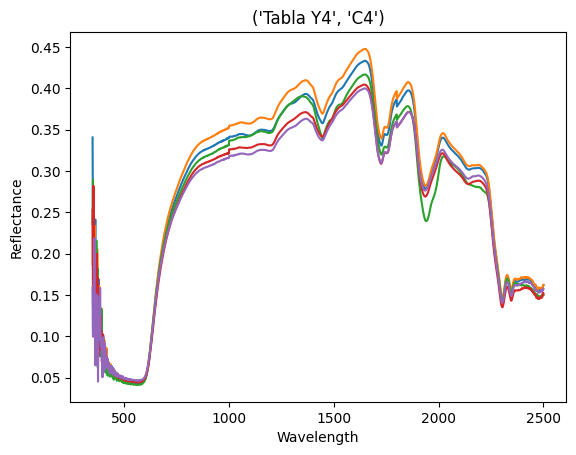

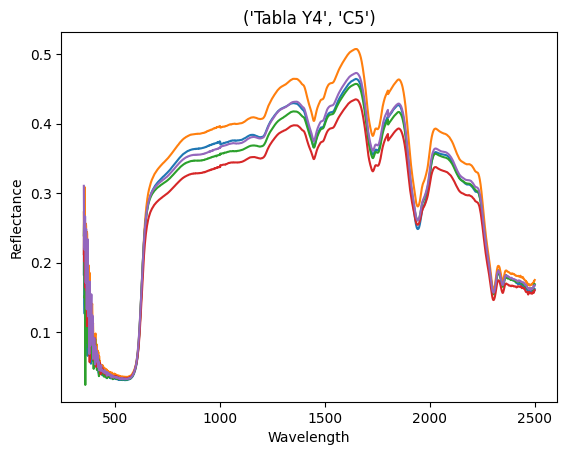

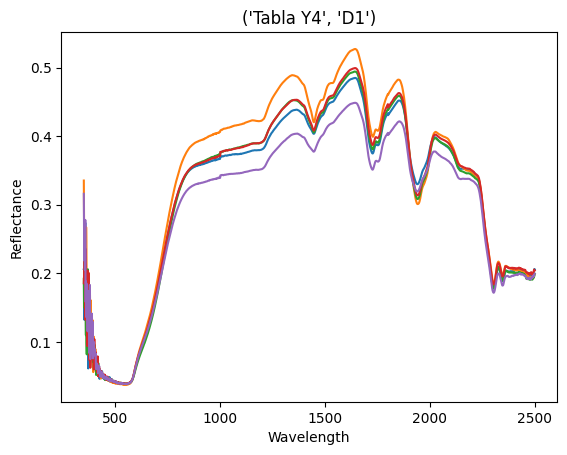

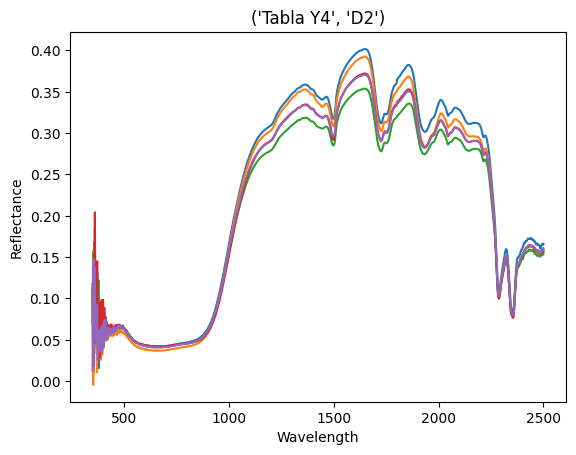

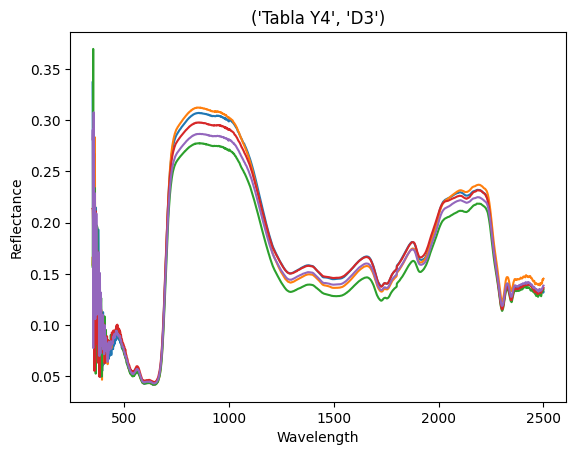

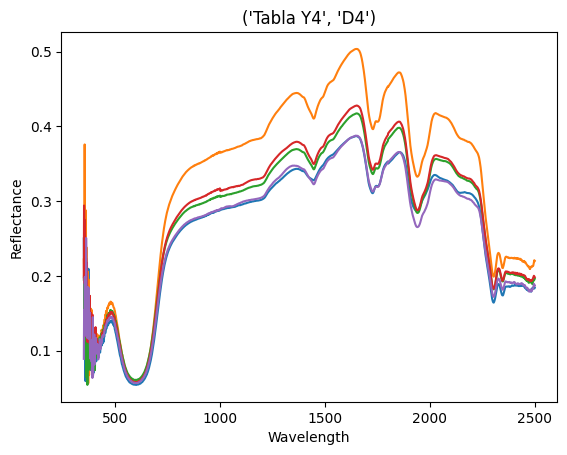

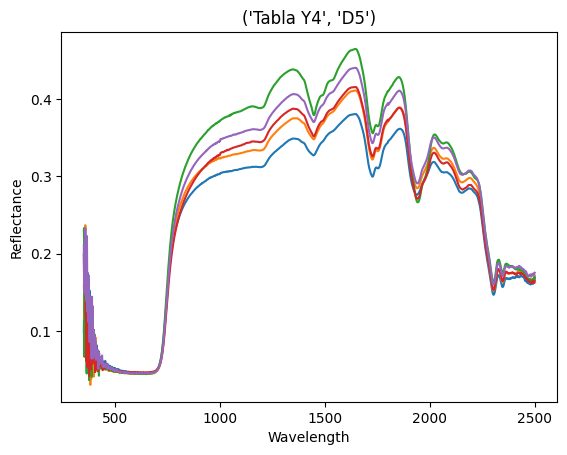

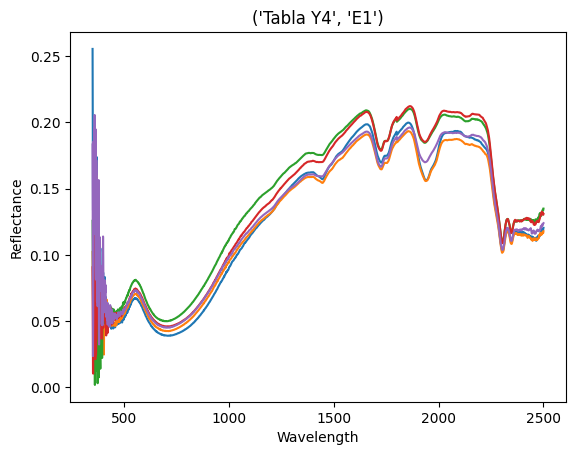

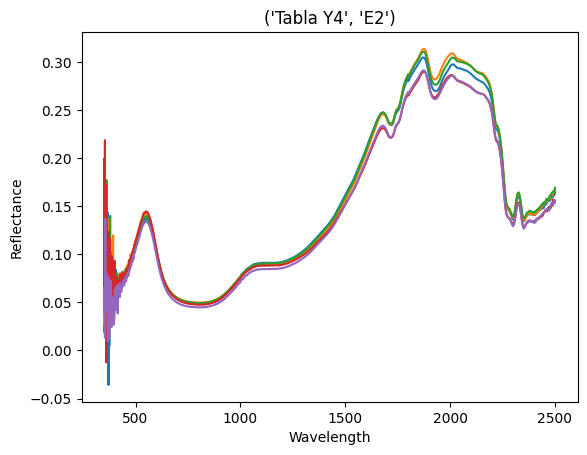

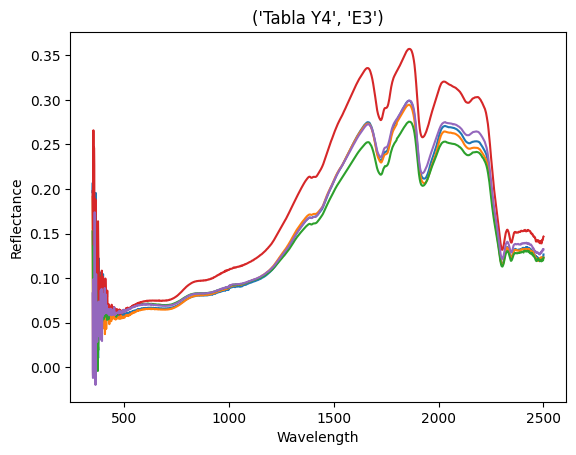

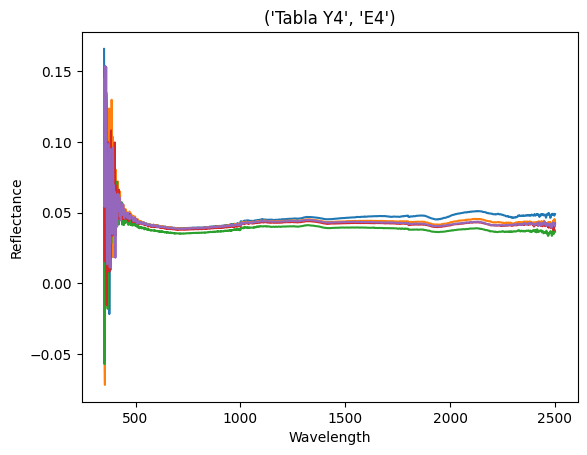

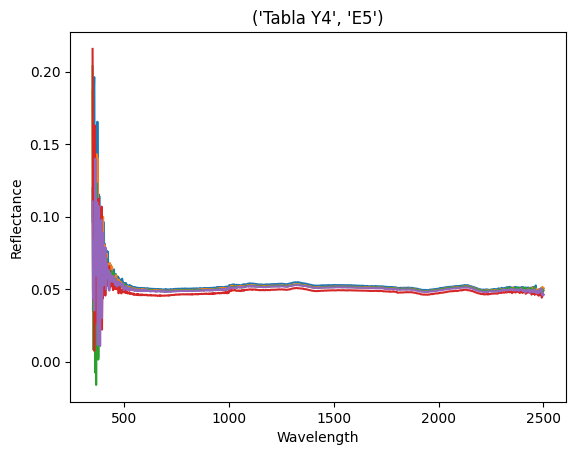

In [5]:
cont = 0
aux = 0

for f in specs_df:
    dev_x = f['x'].to_numpy()
    dev_y = f['y'].to_numpy()
    plt.plot(dev_x, dev_y)
    aux+=1
    if aux == 5:
        aux=0
        plt.xlabel('Wavelength')
        plt.ylabel('Reflectance')
        t = "Tabla Y4",etiquetas[cont]
        plt.title(t)
        plt.show()
        cont+=1

In [ ]:
def imprime_todos():
    for f in specs_df:
        dev_x = f['x'].to_numpy()
        dev_y = f['y'].to_numpy()
        print(dev_y)
        plt.ylabel('Reflectance')
        plt.xlabel('Wavelength')
        t = "Tabla Y4"#,etiquetas[cont]
        plt.plot(dev_x, dev_y)
        plt.title(t)
        plt.show()
      
        cont+=1

# Bayes ingenuo

In [6]:
temp_f=features
# Función auxiliar  Cuenta las diferencias entre dos listas y 
# muestra el índice donde son diferentes.
def show_differences(list1, list2):
  differences = {}
  for i in range(len(list1)):
    if list1[i] != list2[i]:
      differences[i] = [list1[i], list2[i]]
  return differences
features=temp_f

In [7]:
#feature_names = data['feature_names']
feature_names = ['wavelength','reflectance']
labels = np.arange(125)
#temp_l=labels
#features=temp_f

labels = list(range(125)) + list(range(125))
features=np.concatenate((features, features))


print(len(labels))
print(len(features))

250
250


In [8]:
train, test, train_labels, test_labels = train_test_split(
   features,labels,test_size = 1, random_state = 22
)

#print(train)
#print(test)
#print(train_labels)
#print(test_labels)


GNBclf = GaussianNB()

model = GNBclf.fit(train, train_labels)
print(len(model.classes_))
test=features
preds = GNBclf.predict(test)
print(preds)
print(show_differences(preds, labels))


125


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124   0
   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 12

# Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train, train_labels)
reg.score(train, train_labels)
pb = reg.predict(test)
len(pb)
for i in range(len(pb)):
    print("Predicción en",i," es ",round(pb[i],2))

print(show_differences(preds, labels))

Predicción en 0  es  -0.0
Predicción en 1  es  1.0
Predicción en 2  es  2.0
Predicción en 3  es  3.0
Predicción en 4  es  4.0
Predicción en 5  es  5.0
Predicción en 6  es  6.0
Predicción en 7  es  7.0
Predicción en 8  es  8.0
Predicción en 9  es  9.0
Predicción en 10  es  10.0
Predicción en 11  es  11.0
Predicción en 12  es  12.0
Predicción en 13  es  13.0
Predicción en 14  es  14.0
Predicción en 15  es  15.0
Predicción en 16  es  16.0
Predicción en 17  es  17.0
Predicción en 18  es  18.0
Predicción en 19  es  19.0
Predicción en 20  es  20.0
Predicción en 21  es  21.0
Predicción en 22  es  22.0
Predicción en 23  es  23.0
Predicción en 24  es  24.0
Predicción en 25  es  25.0
Predicción en 26  es  26.0
Predicción en 27  es  27.0
Predicción en 28  es  28.0
Predicción en 29  es  29.0
Predicción en 30  es  30.0
Predicción en 31  es  31.0
Predicción en 32  es  32.0
Predicción en 33  es  33.0
Predicción en 34  es  34.0
Predicción en 35  es  35.0
Predicción en 36  es  36.0
Predicción en 37  es

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = LogisticRegression(penalty='l2',solver='lbfgs', max_iter=4000)
#make_pipeline(StandardScaler(), LogisticRegression())
clf.fit(train, train_labels)
clf.score(train, train_labels)
clf.predict_proba(test)
clf.predict(test)

print(show_differences(preds, labels))

{}


# Perceptron

In [ ]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(train, train_labels)
Perceptron()
clf.score(train, train_labels)
clf.predict(train)

print(show_differences(preds, labels))

{}
